# Hands-on Image Processing with Python
## Chapter 11: Deep Learning - Object Detection, Segmentation and Transfer Learning

In [1]:
# Author: Sandipan Dey

## Semantic Segmentation DeepLab

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



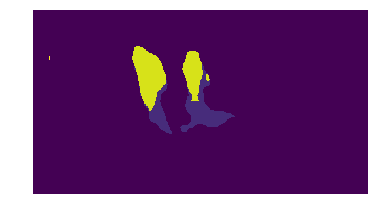

In [7]:
% matplotlib inline
import os
os.chdir('keras-deeplab-v3-plus-master')
from matplotlib import pyplot as plt
import cv2 # used for resize. if you dont have it, use anything else
import numpy as np
from model import Deeplabv3

deeplab_model = Deeplabv3()

pathIn = '../input'
pathOut = '../output'
count = 0
vidcap = cv2.VideoCapture('../cycling.mp4')
success,image = vidcap.read()
success = True
while success:
  #vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))    # added this line - 1 sec 1 frame
  vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*100))    # added this line - 1 sec 10 frames
  success,img = vidcap.read()
  #img = plt.imread("imgs/image1.jpg")
  print ('Read a new frame: ', success)
  w, h, _ = img.shape
  ratio = 512. / np.max([w,h])
  resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
  resized = resized / 127.5 - 1.
  pad_x = int(512 - resized.shape[0])
  resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')
  res = deeplab_model.predict(np.expand_dims(resized2,0))
  labels = np.argmax(res.squeeze(),-1)
  plt.imshow(labels[:-pad_x]), plt.axis('off')
  plt.savefig(pathOut + "\\frame%04d.jpg" % count, bbox_inches='tight', pad_inches=0)  # save frame as JPEG file
  plt.close()
  #cv2.imwrite( pathOut + "\\frame%04d.jpg" % count, labels[:-pad_x])  # save frame as JPEG file
  cv2.imwrite( pathIn + "\\frame%04d.jpg" % count, img)  # save frame as JPEG file
  count = count + 1
os.chdir('..')

In [ ]:
% matplotlib inline
import os
os.chdir('keras-deeplab-v3-plus-master')
from matplotlib import pyplot as plt
import cv2 # used for resize. if you dont have it, use anything else
import numpy as np
from model import Deeplabv3

deeplab_model = Deeplabv3()

pathIn = '../input'
pathOut = '../output'
img = plt.imread(pathIn + "/cycle.jpg")
w, h, _ = img.shape
ratio = 512. / np.max([w,h])
resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
resized = resized / 127.5 - 1.
pad_x = int(512 - resized.shape[0])
resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')
res = deeplab_model.predict(np.expand_dims(resized2,0))
labels = np.argmax(res.squeeze(),-1)
plt.imshow(labels[:-pad_x], cmap='inferno'), plt.axis('off'), plt.colorbar()
plt.savefig(pathOut + "\\segmented.jpg", bbox_inches='tight', pad_inches=0)  # save frame as JPEG file
plt.close()
os.chdir('..')

# Transfer Learning

In [2]:
from keras.applications import VGG16 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
import numpy as np

train_dir = './flower_photos/train'
validation_dir = './flower_photos/valid'
 
nTrain = 500*3
nVal = 50*3

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 25
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,3))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 1650 images belonging to 3 classes.


In [ ]:
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i * batch_size)
    if i * batch_size >= nTrain:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

In [55]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,3))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)
i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break
         
validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 150 images belonging to 3 classes.


In [56]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.normalization import BatchNormalization
 
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(256, activation='relu'))
#model.add(BatchNormalization())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [57]:
model.compile(optimizer = optimizers.Adam(lr=1e-4), #optimizers.RMSprop(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1500 samples, validate on 150 samples
Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.7900 - acc: 0.7360 - val_loss: 0.4416 - val_acc: 0.8533
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2632 - acc: 0.8973 - val_loss: 0.3498 - val_acc: 0.8867
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1602 - acc: 0.9400 - val_loss: 0.3261 - val_acc: 0.8933
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0940 - acc: 0.9640 - val_loss: 0.3099 - val_acc: 0.9067
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0671 - acc: 0.9780 - val_loss: 0.3017 - val_acc: 0.9133
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0504 - acc: 0.9860 - val_loss: 0.3574 - val_acc: 0.8733
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0421 - acc: 0.9887 - val_loss: 0.3697 - val_acc: 0.9000
Epoch 8/

In [58]:
fnames = validation_generator.filenames 
ground_truth = validation_generator.classes 
label2index = validation_generator.class_indices 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items()) 
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features) 
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 13/150


In [59]:
label2index

{'roses': 0, 'sunflowers': 1, 'tulips': 2}

In [63]:
len(train_features), len(validation_features)

(1500, 150)

In [69]:
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 13/150


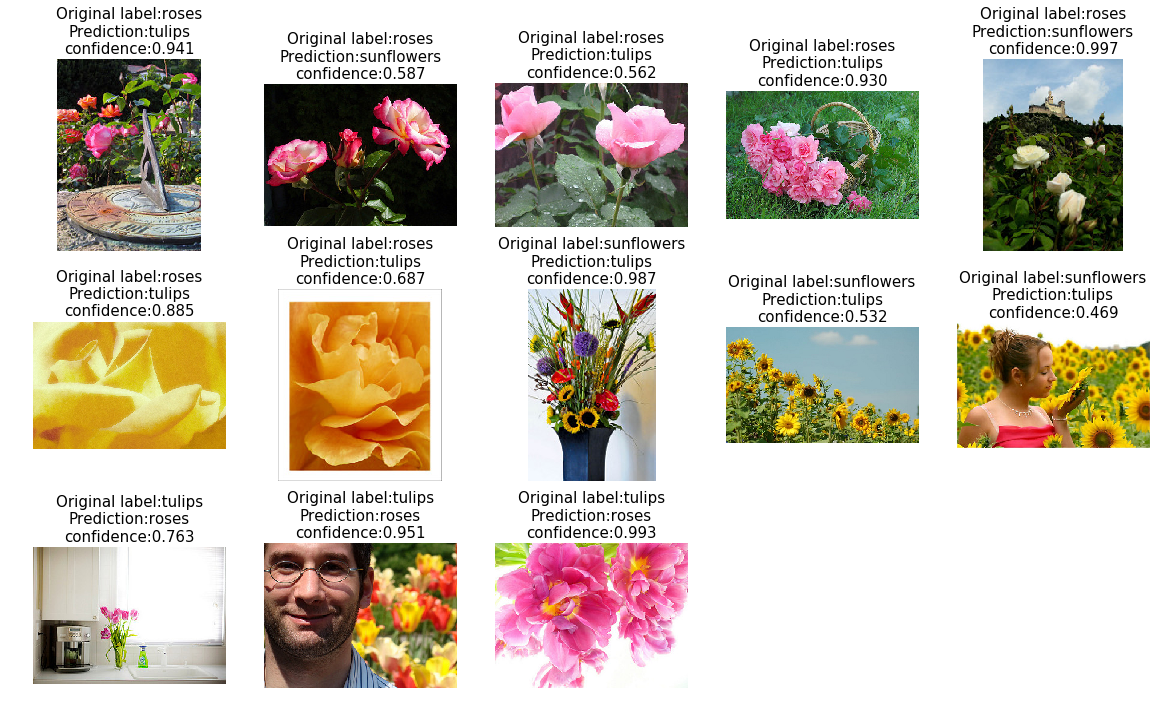

In [75]:
import matplotlib.pylab as plt
from keras.preprocessing.image import load_img
#errors = np.random.choice(errors, 5)
plt.figure(figsize=(20,12))
for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.subplot(3,5,i+1), plt.imshow(original), plt.axis('off')
    plt.title('Original label:{}\nPrediction:{}\nconfidence:{:.3f}'.format(
        fnames[errors[i]].split('\\')[0],
        pred_label,
        prob[errors[i]][pred_class]), size=15)
plt.show()

## YOLO with Keras

In [ ]:
# import the needed modules
import os
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
from PIL import Image

from keras import backend as K
from keras.models import load_model

# The below provided fucntions will be used from yolo_utils.py
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes

# The below functions from the yad2k library will be used
from yad2k.models.keras_yolo import yolo_head, yolo_eval


#Provide the name of the image that you saved in the images folder to be fed through the network
input_image_name = "test45.jpg"

#Obtaining the dimensions of the input image
input_image = Image.open("images/" + input_image_name)
width, height = input_image.size
width = np.array(width, dtype=float)
height = np.array(height, dtype=float)

#Assign the shape of the input image to image_shapr variable
image_shape = (height, width)


#Loading the classes and the anchor boxes that are provided in the madel_data folder
class_names = read_classes("yolo/coco_classes.txt")
anchors = read_anchors("yolo/yolo_anchors.txt")

#Load the pretrained model. Please refer the README file to get info on how to obtain the yolo.h5 file
yolo_model = load_model("yolo/yolo.h5")

#Print the summery of the model
yolo_model.summary()

#Convert final layer features to bounding box parameters
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

#Now yolo_eval function selects the best boxes using filtering and non-max suppression techniques.
# If you want to dive in more to see how this works, refer keras_yolo.py file in yad2k/models
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)


# Initiate a session
sess = K.get_session()


#Preprocess the input image before feeding into the convolutional network
image, image_data = preprocess_image("images/" + input_image_name, model_image_size = (608, 608))

#Run the session
out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes],feed_dict={yolo_model.input:image_data,K.learning_phase(): 0})


#Print the results
print('Found {} boxes for {}'.format(len(out_boxes), input_image_name))
#Produce the colors for the bounding boxs
colors = generate_colors(class_names)
#Draw the bounding boxes
draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
#Apply the predicted bounding boxes to the image and save it
image.save(os.path.join("out", input_image_name), quality=90)
output_image = scipy.misc.imread(os.path.join("out", input_image_name))
imshow(output_image)

## Style Transfer with torch / OpenCV

In [3]:
import cv2
import matplotlib.pyplot as plt
import imutils
import time
import numpy as np

model = 'neural-style-transfer/models/eccv16/starry_night.t7'
print("[INFO] loading style transfer model...")
net = cv2.dnn.readNetFromTorch(model)

img = cv2.imread('../new images/monalisa.jpg')
image = imutils.resize(img, width=600)
(h, w) = image.shape[:2]

b, g, r = np.mean(image[...,0]), np.mean(image[...,1]), np.mean(image[...,2])

# construct a blob from the image, set the input, and then perform a
# forward pass of the network
blob = cv2.dnn.blobFromImage(image, 1.0, (w, h), (b, g, r), swapRB=False, crop=False)
net.setInput(blob)
start = time.time()
output = net.forward()
end = time.time()

# reshape the output tensor, add back in the mean subtraction, and
# then swap the channel ordering
output = output.reshape((3, output.shape[2], output.shape[3]))
output[0] += b
output[1] += g
output[2] += r
#output /= 255.0
output = output.transpose(1, 2, 0)

# show information on how long inference took
print("[INFO] neural style transfer took {:.4f} seconds".format(end - start))

#plt.imshow(output / 255.0)
#plt.show()
# show the images
cv2.imwrite('output/styled.jpg', output) 

[INFO] loading style transfer model...
[INFO] neural style transfer took 1.1100 seconds


True

In [36]:
output[0].shape

(600, 3)

In [147]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import imutils
import time

model = 'neural-style-transfer/models/eccv16/starry_night.t7'
print("[INFO] loading style transfer model...")
net = cv2.dnn.readNetFromTorch(model)

img = cv2.imread('../new images/monalisa.jpg')
image = imutils.resize(img, width=600)
(h, w) = image.shape[:2]

b, g, r = np.mean(image[...,0]), np.mean(image[...,1]), np.mean(image[...,2])

# construct a blob from the image, set the input, and then perform a
# forward pass of the network
blob = cv2.dnn.blobFromImage(image, 1.0, (w, h), (b, g, r), swapRB=False, crop=False)
net.setInput(blob)
start = time.time()
output = net.forward()
end = time.time()

# reshape the output tensor, add back in the mean subtraction, and
# then swap the channel ordering
output = output.reshape((3, output.shape[2], output.shape[3]))
output[0] += b
output[1] += g
output[2] += r
#output /= 255.0
output = output.transpose(1, 2, 0)

# show information on how long inference took
print("[INFO] neural style transfer took {:.4f} seconds".format(end - start))

#plt.imshow(output / 255.0)
#plt.show()
# show the images
cv2.imwrite('output/styled.jpg', output) 

[INFO] loading style transfer model...
[INFO] neural style transfer took 0.9943 seconds


True

In [ ]:
## Pred-trained 

In [ ]:
import numpy as np
import tensorflow as tf
import cv2 as cv

# Read the graph.
with tf.gfile.FastGFile('frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    # Restore session
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    # Read and preprocess an image.
    img = cv.imread('example.jpg')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})

    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.3:
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

cv.imwrite('TensorFlow MobileNet-SSD.jpg', img)

## YOLO v2 with Keras

In [94]:
#https://github.com/qqwweee/keras-yolo3
#https://github.com/miranthajayatilake/YOLOw-Keras/
#https://pjreddie.com/darknet/yolo/
# import the needed modules
import os
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
from PIL import Image

from keras import backend as K
from keras.models import load_model

# The below provided fucntions will be used from yolo_utils.py
#from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes

# The below functions from the yad2k library will be used
from yad2k.models.keras_yolo import yolo_head, yolo_eval

import colorsys
import imghdr
import os
import random
from keras import backend as K

import numpy as np
from PIL import Image, ImageDraw, ImageFont

def read_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def read_anchors(anchors_path):
    with open(anchors_path) as f:
        anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        anchors = np.array(anchors).reshape(-1, 2)
    return anchors

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors

def scale_boxes(boxes, image_shape):
    """ Scales the predicted boxes in order to be drawable on the image"""
    height = image_shape[0]
    width = image_shape[1]
    image_dims = K.stack([height, width, height, width])
    image_dims = K.reshape(image_dims, [1, 4])
    boxes = boxes * image_dims
    return boxes

def preprocess_image(img_path, model_image_size):
    image_type = imghdr.what(img_path)
    image = Image.open(img_path)
    resized_image = image.resize(tuple(reversed(model_image_size)), Image.BICUBIC)
    image_data = np.array(resized_image, dtype='float32')
    image_data /= 255.
    image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
    return image, image_data

def draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors):
    
    font = ImageFont.truetype(font='font/FiraMono-Medium.otf',size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
    thickness = (image.size[0] + image.size[1]) // 300

    for i, c in reversed(list(enumerate(out_classes))):
        predicted_class = class_names[c]
        box = out_boxes[i]
        score = out_scores[i]

        label = '{} {:.2f}'.format(predicted_class, score)

        draw = ImageDraw.Draw(image)
        label_size = draw.textsize(label, font)

        top, left, bottom, right = box
        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
        right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
        print(label, (left, top), (right, bottom))

        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])

        # My kingdom for a good redistributable image drawing library.
        for i in range(thickness):
            draw.rectangle([left + i, top + i, right - i, bottom - i], outline=colors[c])
        draw.rectangle([tuple(text_origin), tuple(text_origin + label_size)], fill=colors[c])
        draw.text(text_origin, label, fill=(0, 0, 0), font=font)
        del draw

#Provide the name of the image that you saved in the images folder to be fed through the network
input_image_name = "giraffe_zebra.jpg"

#Obtaining the dimensions of the input image
input_image = Image.open("images/" + input_image_name)
width, height = input_image.size
width = np.array(width, dtype=float)
height = np.array(height, dtype=float)

#Assign the shape of the input image to image_shapr variable
image_shape = (height, width)


#Loading the classes and the anchor boxes that are provided in the madel_data folder
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")

#Load the pretrained model. Please refer the README file to get info on how to obtain the yolo.h5 file
yolo_model = load_model("model_data/yolo.h5")

#Print the summery of the model
yolo_model.summary()

#Convert final layer features to bounding box parameters
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

#Now yolo_eval function selects the best boxes using filtering and non-max suppression techniques.
# If you want to dive in more to see how this works, refer keras_yolo.py file in yad2k/models
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)


# Initiate a session
sess = K.get_session()


#Preprocess the input image before feeding into the convolutional network
image, image_data = preprocess_image("images/" + input_image_name, model_image_size = (608, 608))

#Run the session
out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes],feed_dict={yolo_model.input:image_data,K.learning_phase(): 0})


#Print the results
print('Found {} boxes for {}'.format(len(out_boxes), input_image_name))
#Produce the colors for the bounding boxs
colors = generate_colors(class_names)
#Draw the bounding boxes
draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
#Apply the predicted bounding boxes to the image and save it
image.save(os.path.join("output", input_image_name), quality=90)
output_image = scipy.misc.imread(os.path.join("output", input_image_name))
imshow(output_image)

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 608, 608, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

Found 5 boxes for giraffe_zebra.jpg
zebra 0.83 (16, 325) (126, 477)
giraffe 0.89 (56, 175) (272, 457)
zebra 0.91 (370, 326) (583, 472)
giraffe 0.94 (388, 119) (554, 415)
giraffe 0.95 (205, 111) (388, 463)
